###Collect Data for plot

In [1]:
import json
with open('../skyrim_data/tag_category_skyrim.json','r') as f:
    cat_dict = json.load(f)

with open('../skyrim_data/taglist_by_mod.json','r') as f:
    tag_dict = json.load(f)

with open('../skyrim_data/skyrim_mods_all.json','r') as f:
    mod_dict = json.load(f)

In [58]:
#Removed double counting, i.e. if a mod is present in a category its downloads are counted once
cat_mod = {}
cat_dl = {}
cat_mno = {}
tag_dl = {}
tag_mno = {}
for k1 in cat_dict.keys():
    cat_mod[k1] = []
    v1 = cat_dict[k1]
    cat_dl[k1] = 0
    for t1 in v1:
        tag_dl[t1] = 0
        m1 = tag_dict[t1]
        cat_mod[k1] += m1
        cat_mod[k1] = list(set(cat_mod[k1]))
        tag_mno[t1] = len(m1)
        for m in m1:
            dl = mod_dict[m][-2]
            try:
                
                tag_dl[t1] += int(dl.replace(',',''))
            except:
                pass
    cat_mno[k1] = len(cat_mod[k1])
    for m in cat_mod[k1]:
            dl = mod_dict[m][-2]
            try:
                
                cat_dl[k1] += int(dl.replace(',',''))
            except:
                pass

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import pylab
%matplotlib inline
fontP = FontProperties()
fontP.set_size('xx-large')

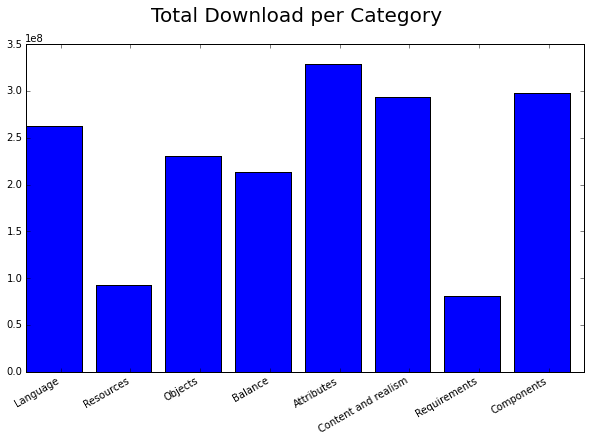

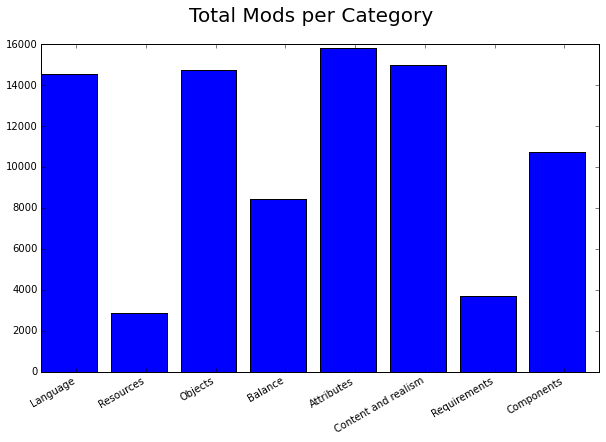

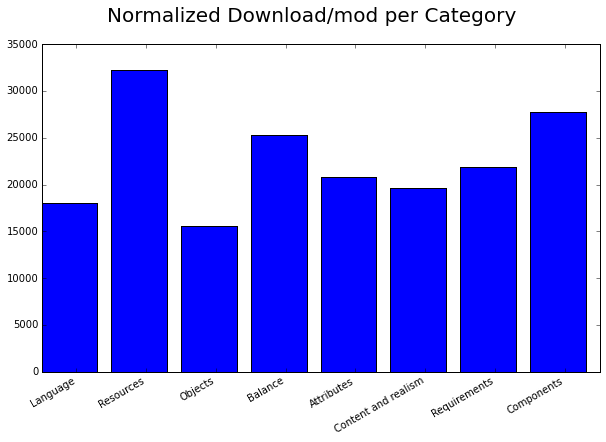

In [55]:
x = list(cat_dl.keys())
y = list(cat_dl.values())

x1 = list(cat_mno.keys())
y1 = list(cat_mno.values())

norm_y = list(np.divide(y,y1))

width = 1

fig = plt.figure(figsize=(10,6.5))
ind = np.arange(len(y))
plt.bar(ind,y)
plt.xticks(ind + width / 2, x)
fig.autofmt_xdate()
fig.suptitle("Total Download per Category",fontsize=20)

fig = plt.figure(figsize=(10,6.5))
ind = np.arange(len(y1))
plt.bar(ind,y1)
plt.xticks(ind + width / 2, x1)
fig.autofmt_xdate()
fig.suptitle("Total Mods per Category",fontsize=20)

fig = plt.figure(figsize=(10,6.5))
ind = np.arange(len(norm_y))
plt.bar(ind,norm_y)
plt.xticks(ind + width / 2, x1)
fig.autofmt_xdate()
fig.suptitle("Normalized Download/mod per Category",fontsize=20)

In [85]:
print (cat_dict['Attributes'])
print (len(cat_dict['Attributes']))

['Chargen', 'Companion Friendly', 'Companions', 'Compilation', 'ENB Preset', 'Faction: College of Winterhold', 'Faction: Companions', 'Faction: Dark Brotherhood', 'Faction: Thieves Guild', 'For female characters', 'For male characters', 'Gameplay Effects/Changes', 'Official', 'Performance Optimization', 'Poses', 'Related to horses', 'Related to MLP', 'Related to Movies/TV/Other Games', 'Related to vampires', 'Replacer', 'Solstheim']
21


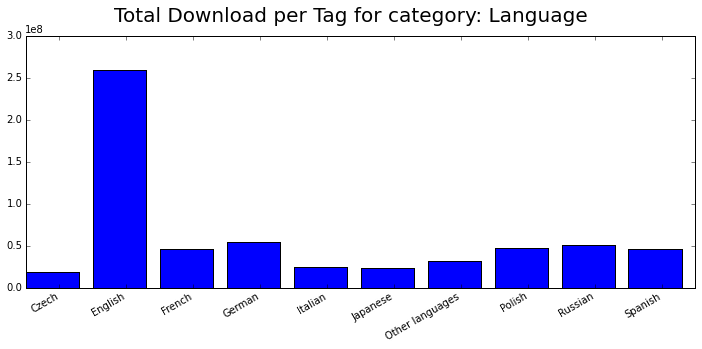

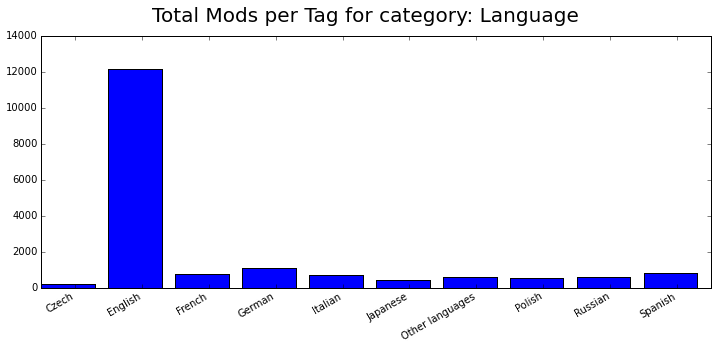

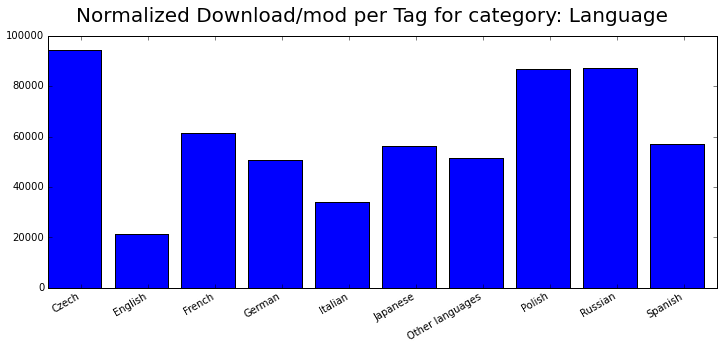

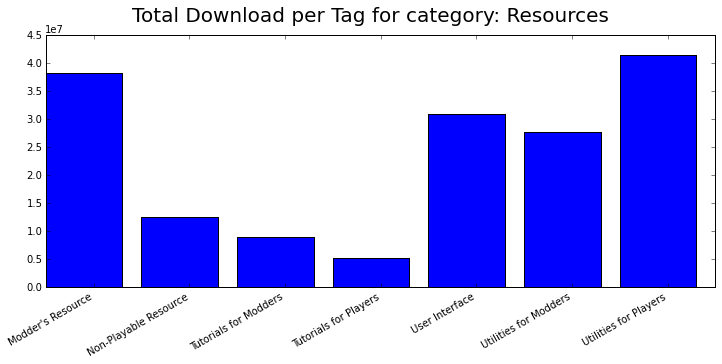

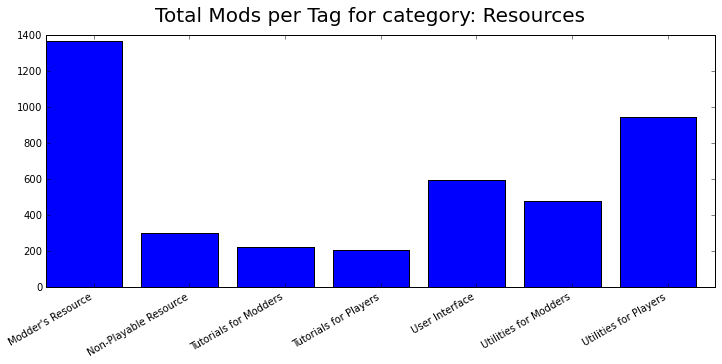

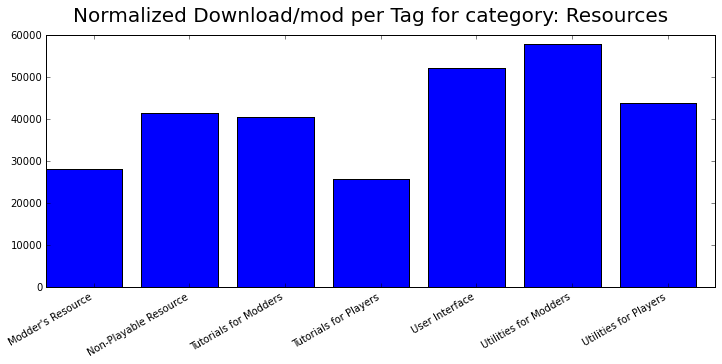

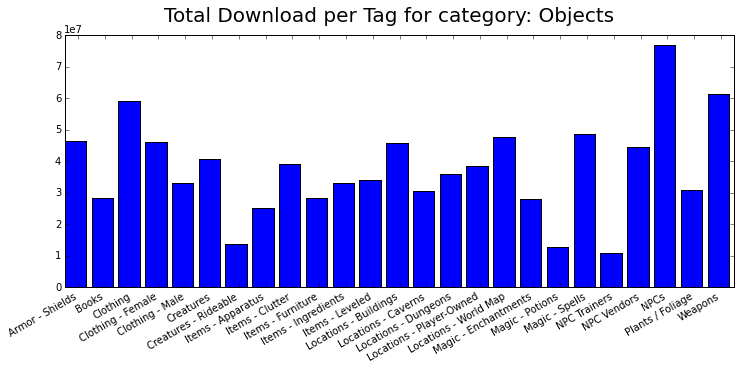

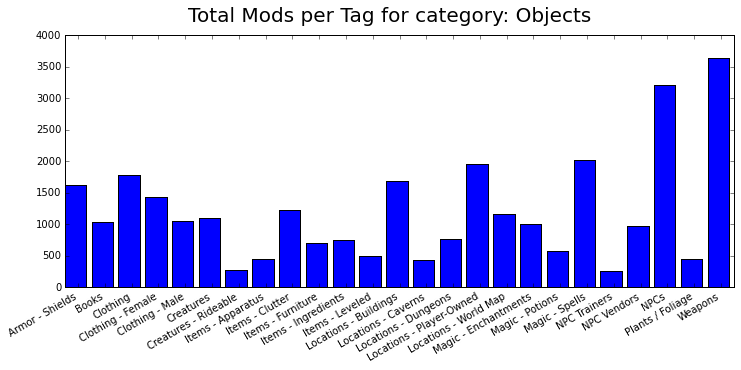

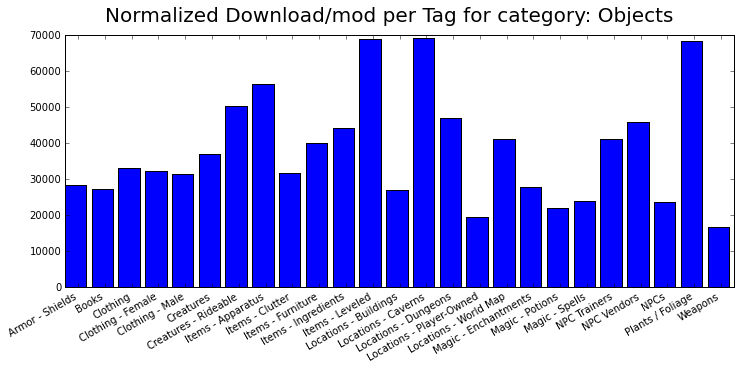

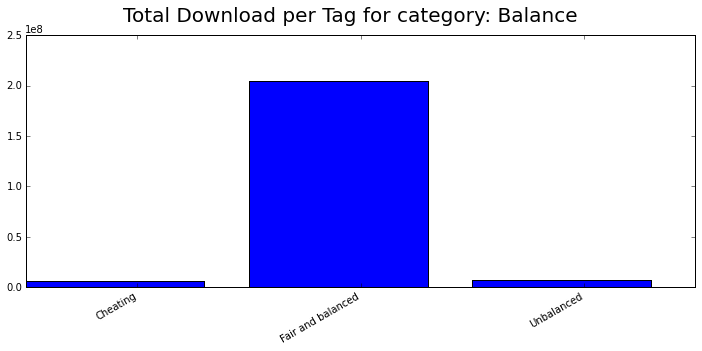

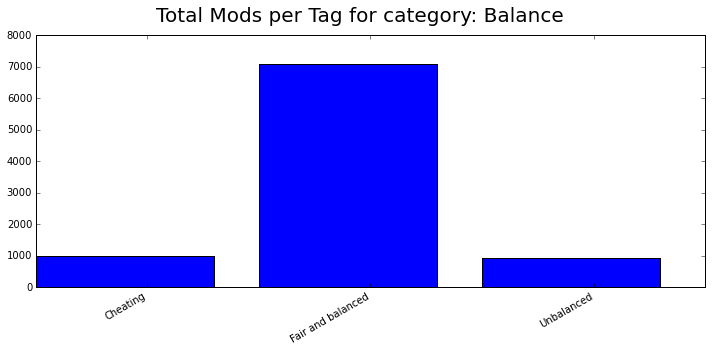

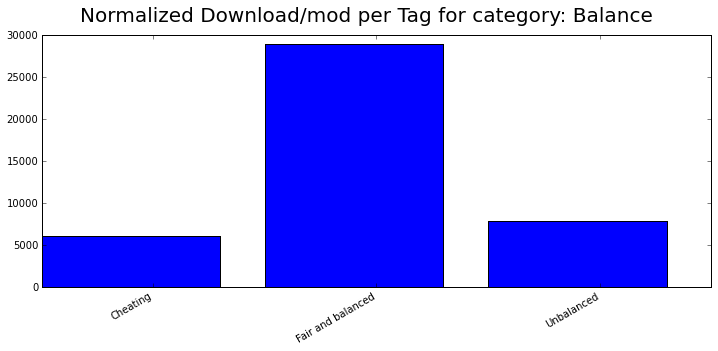

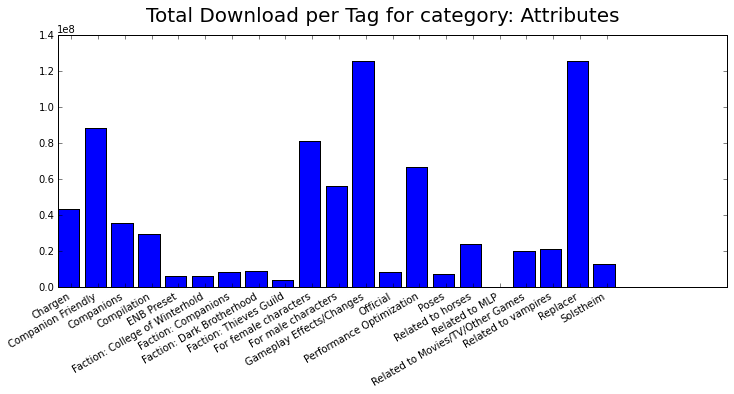

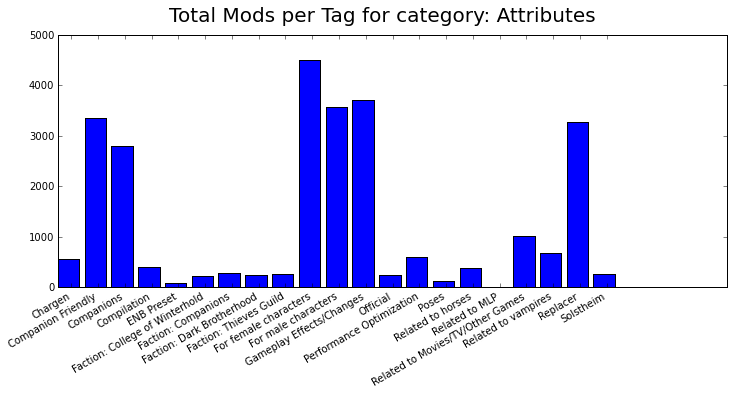

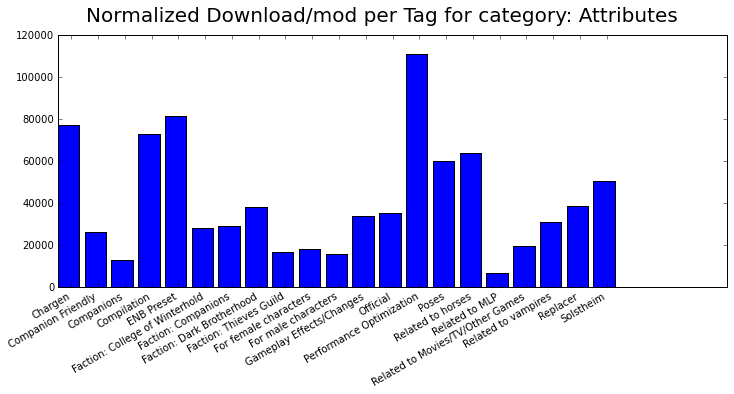

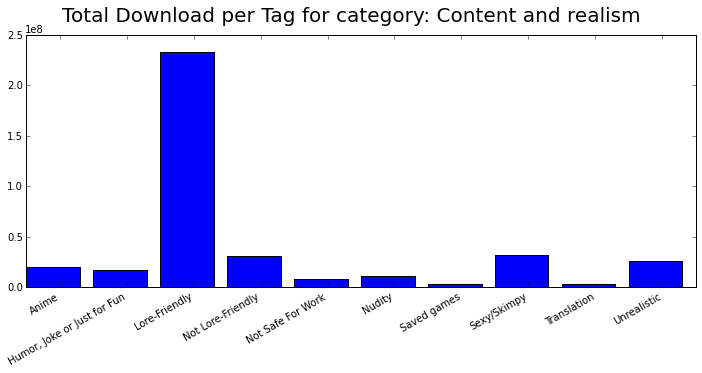

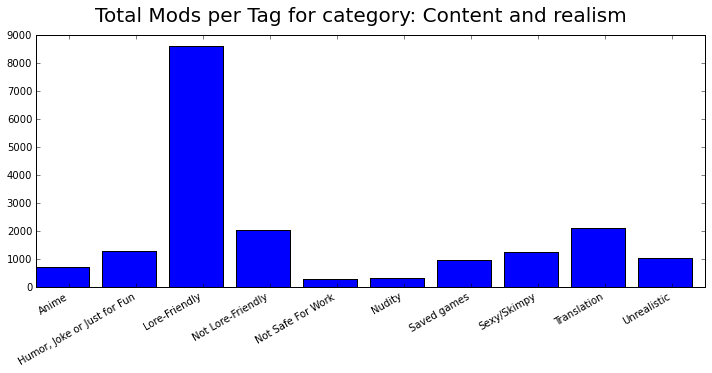

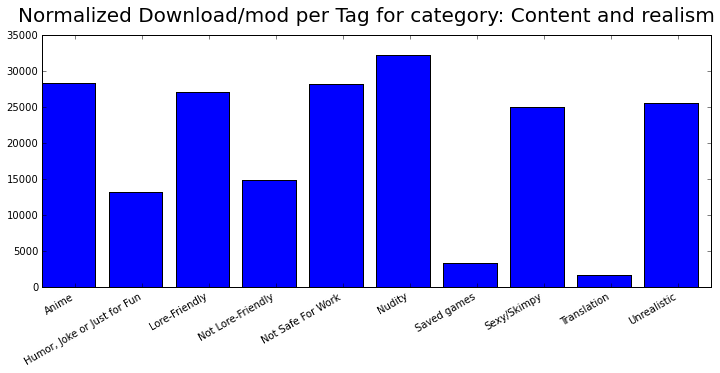

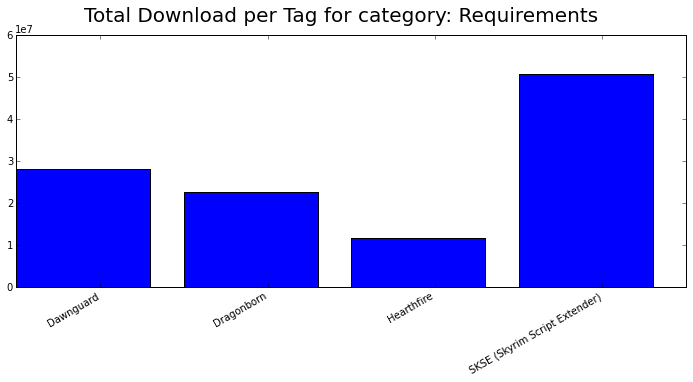

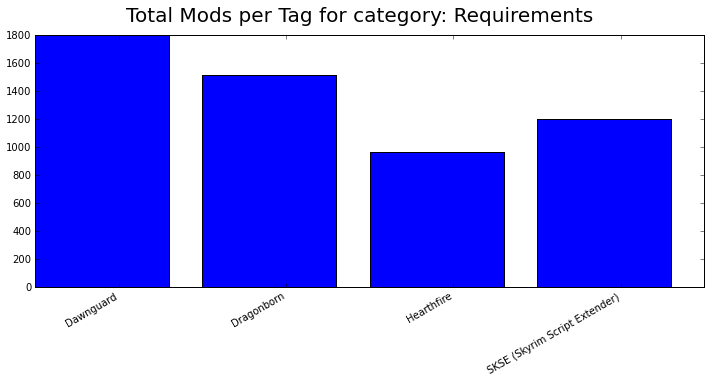

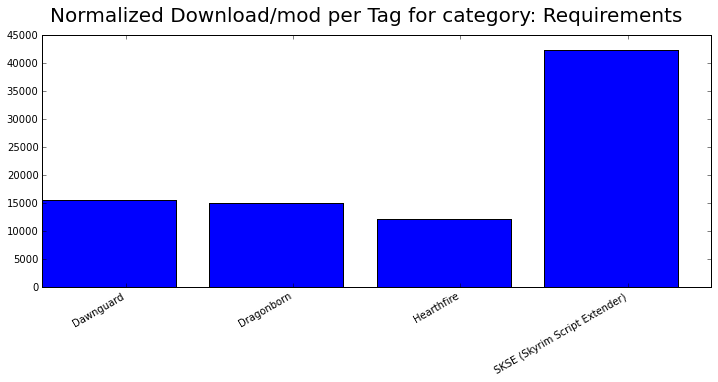

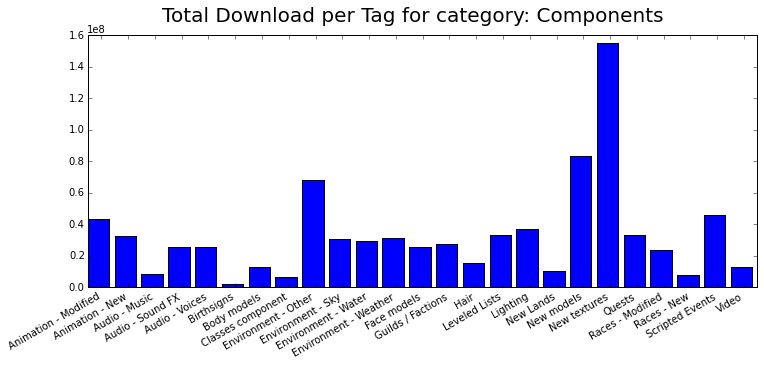

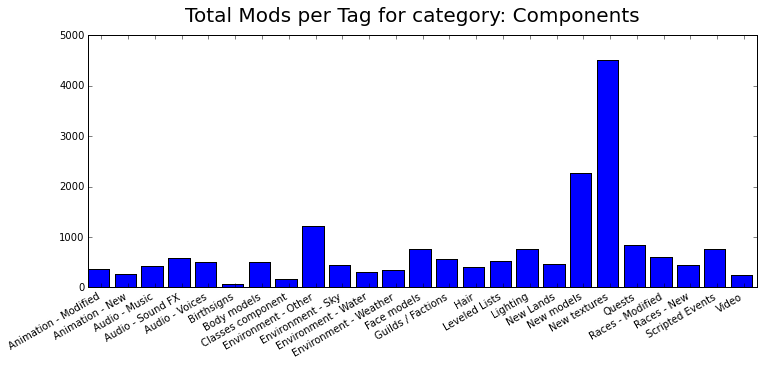

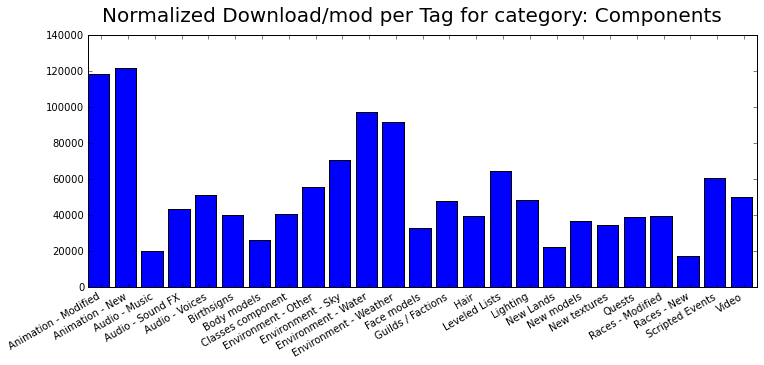

In [87]:
for k in cat_dict.keys():
    tags = cat_dict[k]
    x = []
    y = []
    y1 = []
    for tag in tags:
        x.append(tag)
        y.append(tag_dl[tag])
        y1.append(tag_mno[tag])
    norm_y = list(np.divide(y,y1))
    fig = plt.figure(figsize=(12,5))
    ind = np.arange(len(y))
    plt.bar(ind,y)
    plt.xticks(ind + width / 2, x)
    fig.autofmt_xdate()
    fig.suptitle("Total Download per Tag for category: "+k,fontsize=20)

    fig = plt.figure(figsize=(12,5))
    ind = np.arange(len(y1))
    plt.bar(ind,y1)
    plt.xticks(ind + width / 2, x)
    fig.autofmt_xdate()
    fig.suptitle("Total Mods per Tag for category: "+k,fontsize=20)

    fig = plt.figure(figsize=(12,5))
    ind = np.arange(len(norm_y))
    plt.bar(ind,norm_y)
    plt.xticks(ind + width / 2, x)
    fig.autofmt_xdate()
    fig.suptitle("Normalized Download/mod per Tag for category: "+k,fontsize=20)

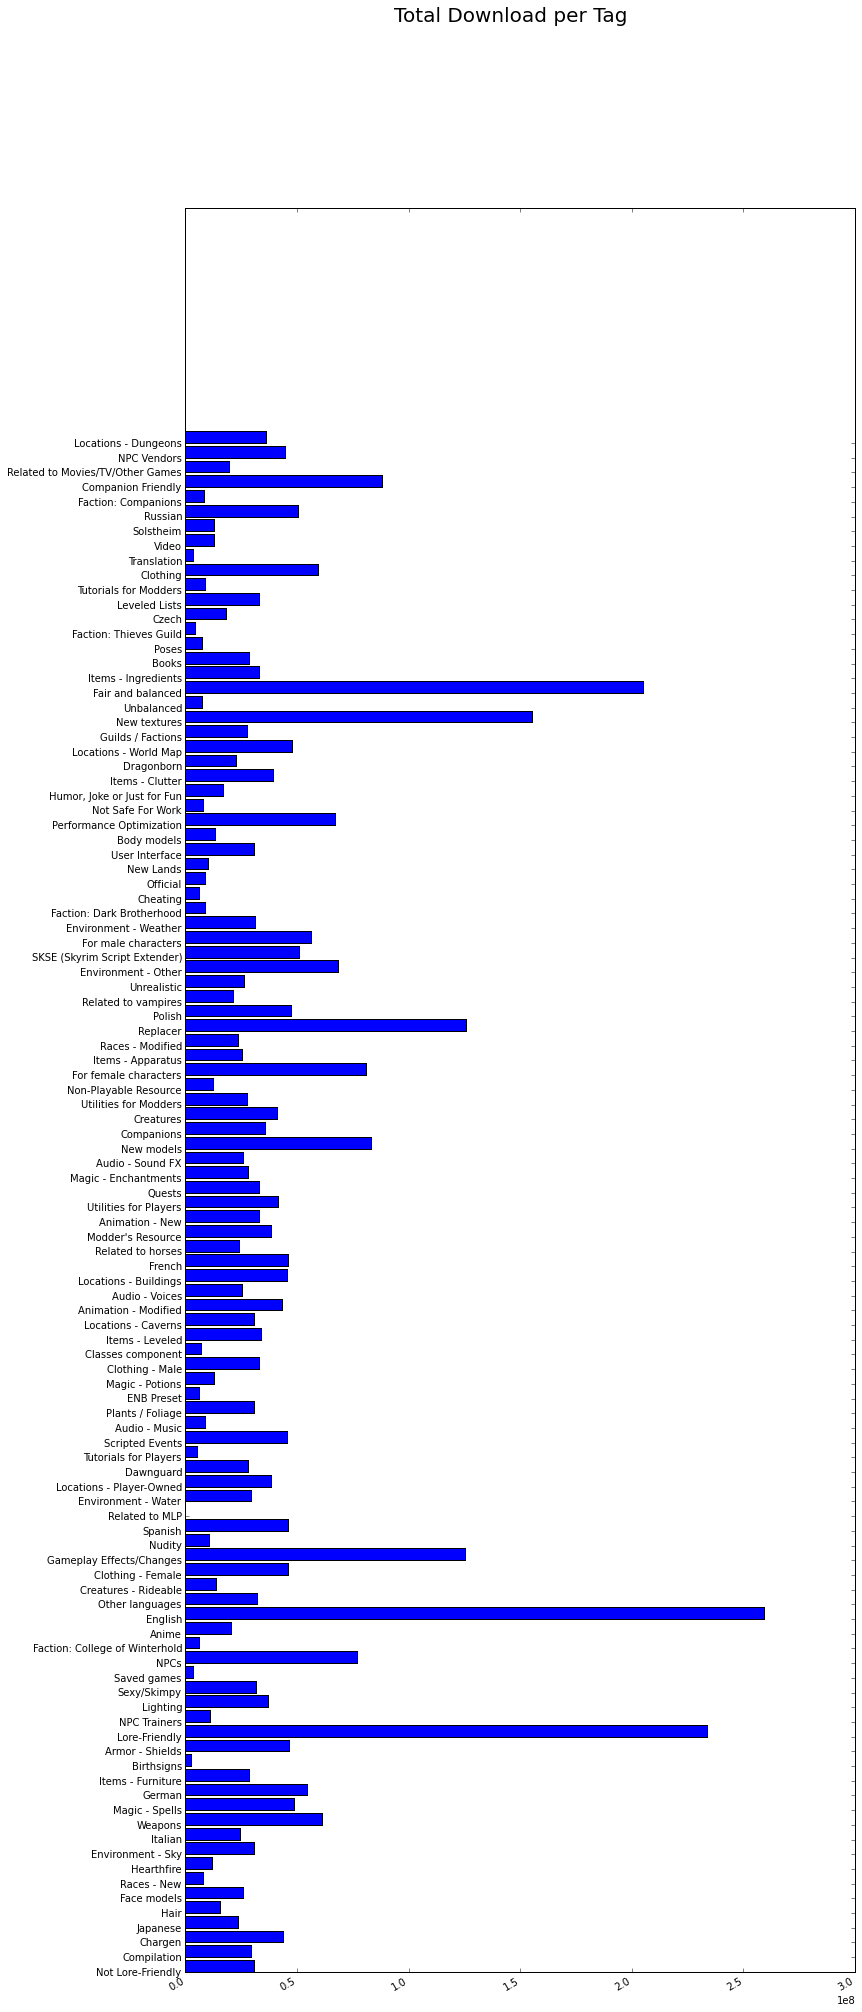

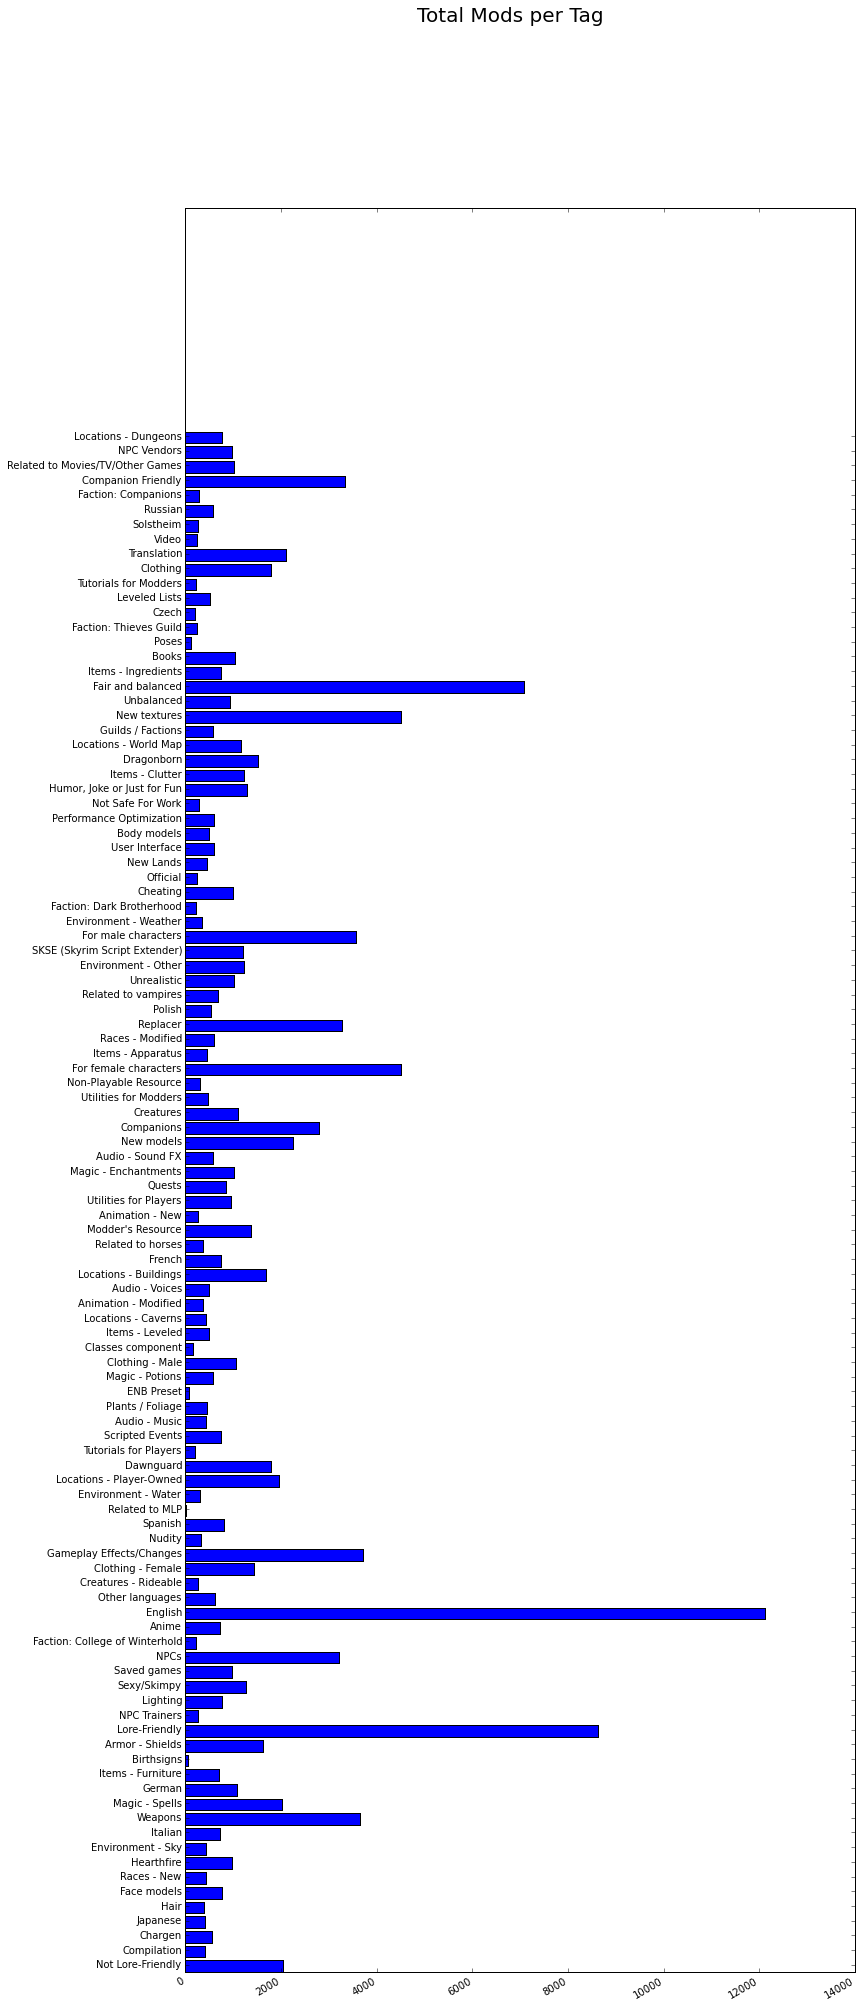

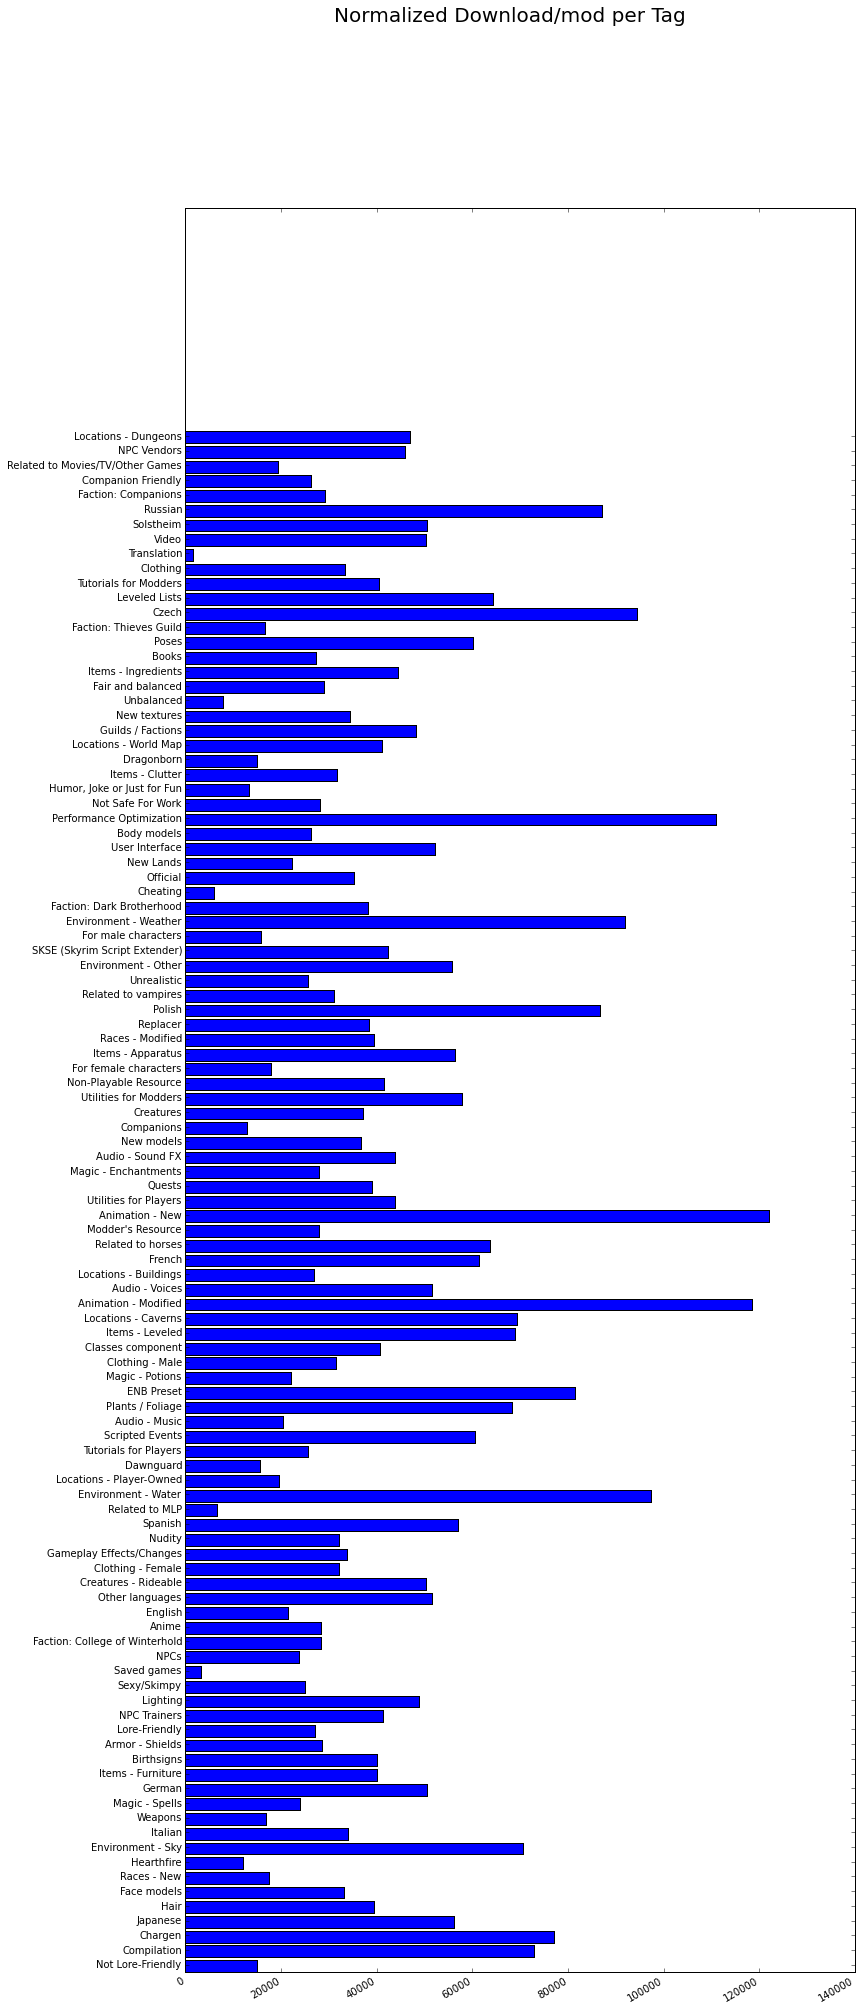

In [75]:
x = list(tag_dl.keys())
y = list(tag_dl.values())

x1 = list(tag_mno.keys())
y1 = list(tag_mno.values())

norm_y = list(np.divide(y,y1))

width = 1

fig = plt.figure(figsize=(12,35))
ind = np.arange(len(y))
plt.barh(ind,y)
plt.yticks(ind + width / 2, x)
fig.autofmt_xdate()
fig.suptitle("Total Download per Tag",fontsize=20)

fig = plt.figure(figsize=(12,35))
ind = np.arange(len(y1))
plt.barh(ind,y1)
plt.yticks(ind + width / 2, x1)
fig.autofmt_xdate()
fig.suptitle("Total Mods per Tag",fontsize=20)

fig = plt.figure(figsize=(12,35))
ind = np.arange(len(norm_y))
plt.barh(ind,norm_y)
plt.yticks(ind + width / 2, x1)
fig.autofmt_xdate()
fig.suptitle("Normalized Download/mod per Tag",fontsize=20)